### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']
name = list(map(str, [i for i in range(100)]))
df = pd.DataFrame(X, columns=variables, index=name)
df.head()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011


### 非階層的手法

#### K-means法

##### エルボー法

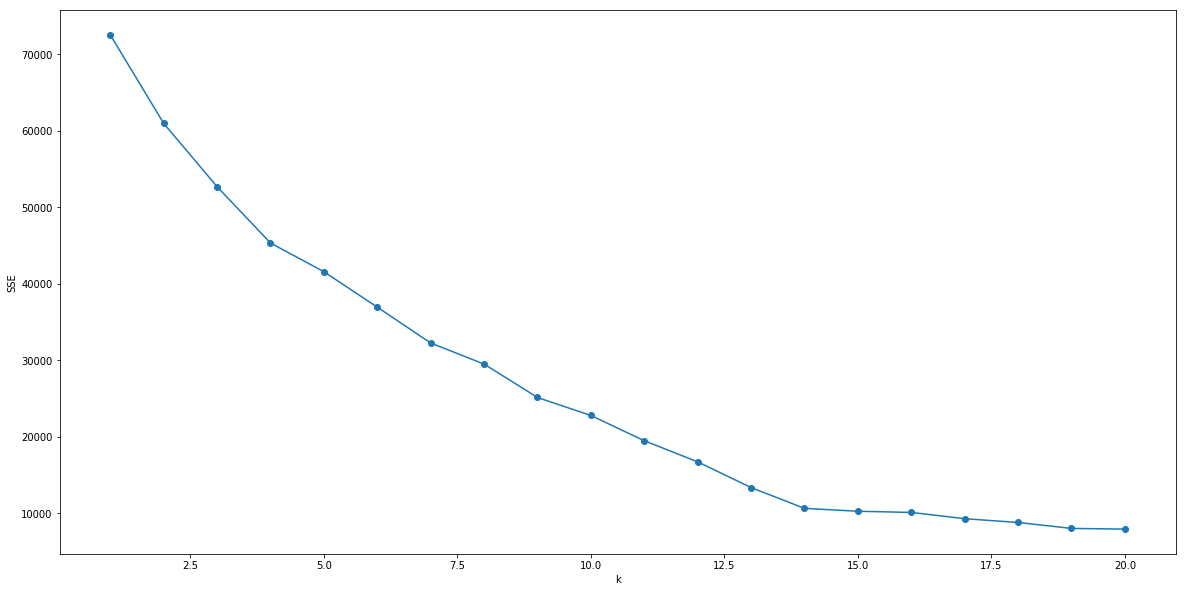

In [3]:
SSE = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 21), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

##### シルエット分析

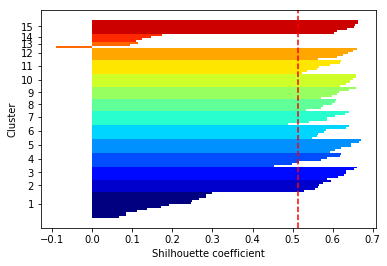

In [4]:
km = KMeans(n_clusters=15, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Shilhouette coefficient')
plt.show()
    

### 階層的手法

#### 完全連結法

In [5]:
row_dist = pd.DataFrame(squareform(pdist(X, metric='euclidean')), columns=name, index=name)
row_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,52.624242,41.002106,41.625637,39.249034,47.701933,32.179620,49.747503,49.666381,35.879622,...,39.971755,40.101113,36.302668,46.123429,34.316881,41.552686,36.526345,42.388381,49.614646,31.878080
1,52.624242,0.000000,41.518133,32.704102,38.814321,30.022858,42.322500,34.028919,36.617068,43.626511,...,42.839134,33.993358,41.955066,29.827856,44.196886,44.767414,40.557779,50.877129,34.587267,40.386819
2,41.002106,41.518133,0.000000,32.868977,33.399859,27.233159,42.507352,41.581994,41.808531,39.744987,...,36.407685,32.282881,38.455123,25.083459,37.596550,35.877068,34.215529,29.422092,39.936018,33.606443
3,41.625637,32.704102,32.868977,0.000000,31.392470,33.169500,33.098625,42.137292,25.761110,38.883694,...,32.165894,13.410504,38.109023,31.304615,38.924134,34.846774,35.414275,41.043790,41.581587,34.986789
4,39.249034,38.814321,33.399859,31.392470,0.000000,43.270015,34.126482,42.763238,39.462839,40.779959,...,38.691776,33.022617,40.542457,38.589212,38.451755,38.684309,13.742664,39.562581,44.263847,35.345464


##### 樹形図

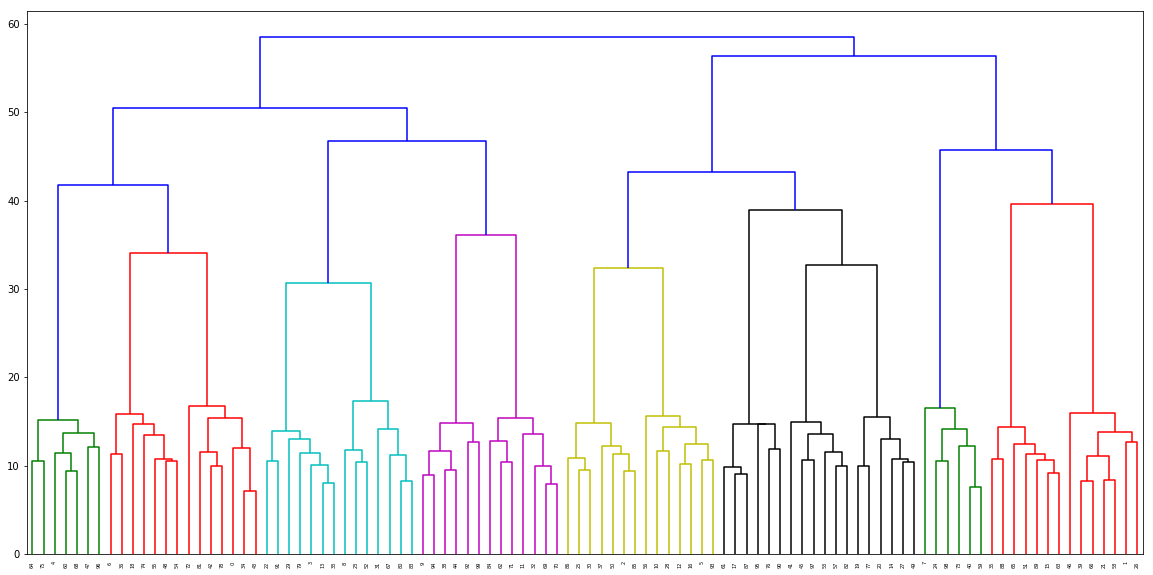

In [6]:
plt.figure(figsize=(20, 10))
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

##### 階層的手法を用いたクラスタリングの実行

In [7]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='complete')
y_complete = complete.fit_predict(X)

print('Cluster labels:' + str(np.unique(y_complete)))

Cluster labels:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### 結論：いくつのクラスタに分類するか

エルボー法では、セントロイドの数が14もしくは15あたりからSSEの減少幅が小さくなり、階層的手法の完全連結法では、y軸を20くらいできると15ブロックのまとまりにわかれるので、15分類にわけるのが分け方としては一番きれいに分類できる。
ただし、15種類の系統は顧客にとって多すぎて困惑させてしまう可能性もあるため、もっとわかりやすさとシンプルさを優先するなら、階層的手法のy軸40くらいでカットしたときの8ブロックで8分類にするのが良いと思います。

### 決定木分析を活用したクラスタの説明


In [8]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
y_complete = complete.fit_predict(X)

print('Cluster labels:' + str(np.unique(y_complete)))

Cluster labels:[0 1 2 3 4 5 6 7]


In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y_complete)
predicted = clf.predict(X)
predicted

array([2, 0, 6, 4, 7, 6, 2, 5, 4, 3, 6, 3, 6, 4, 1, 0, 6, 1, 2, 1, 1, 0, 4,
       4, 5, 6, 0, 1, 6, 4, 6, 4, 3, 4, 2, 0, 2, 6, 3, 0, 5, 1, 2, 2, 3, 1,
       0, 7, 2, 1, 6, 0, 4, 1, 2, 2, 6, 1, 0, 5, 7, 1, 3, 0, 7, 0, 0, 4, 7,
       3, 3, 3, 2, 5, 2, 7, 1, 1, 2, 4, 4, 2, 1, 4, 3, 6, 6, 1, 0, 0, 1, 4,
       3, 6, 3, 1, 7, 1, 5, 3])

In [10]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names=variables, class_names=name, filled=True, rounded=True)

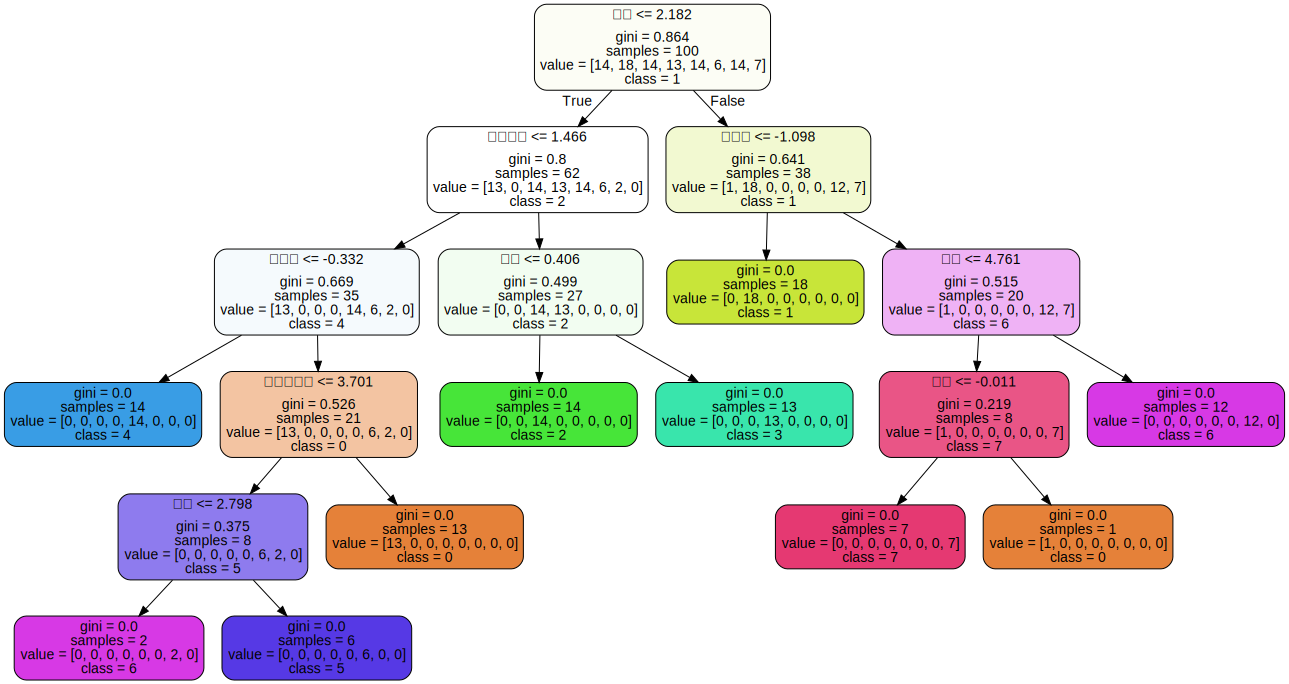

In [11]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)